# Charles Book Club The Art History of Florence Analysis
* \* **Author**: Jaden Speiser
* \* **Purpose**: Provide analysis of the Charles Book Club database to find potential customers for The Art History of Florence

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [2]:
## Read Data
book = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/master/CharlesBookClub.csv')
book.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1


In [3]:
## Examine the Dataset
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Seq#              4000 non-null   int64
 1   ID#               4000 non-null   int64
 2   Gender            4000 non-null   int64
 3   M                 4000 non-null   int64
 4   R                 4000 non-null   int64
 5   F                 4000 non-null   int64
 6   FirstPurch        4000 non-null   int64
 7   ChildBks          4000 non-null   int64
 8   YouthBks          4000 non-null   int64
 9   CookBks           4000 non-null   int64
 10  DoItYBks          4000 non-null   int64
 11  RefBks            4000 non-null   int64
 12  ArtBks            4000 non-null   int64
 13  GeogBks           4000 non-null   int64
 14  ItalCook          4000 non-null   int64
 15  ItalAtlas         4000 non-null   int64
 16  ItalArt           4000 non-null   int64
 17  Florence          4000 non-null  

In [5]:
## Check for null values
null_values = book.isnull().sum()
print(null_values)

Seq#                0
ID#                 0
Gender              0
M                   0
R                   0
F                   0
FirstPurch          0
ChildBks            0
YouthBks            0
CookBks             0
DoItYBks            0
RefBks              0
ArtBks              0
GeogBks             0
ItalCook            0
ItalAtlas           0
ItalArt             0
Florence            0
Related Purchase    0
Mcode               0
Rcode               0
Fcode               0
Yes_Florence        0
No_Florence         0
dtype: int64


In [9]:
## Values of 1 and 0 for Florence column
Florence1 = book[book['Florence']== 1]['Florence'].count()
Florence0 = book[book['Florence']== 0]['Florence'].count()
print('Florence 1 values are:',Florence1)
print('Florence 0 values are:',Florence0)

Florence 1 values are: 338
Florence 0 values are: 3662


In [4]:
## Standardize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
book[['Gender_s', 'M_s', 'R_s', 'F_s', 'FirstPurch_s', 'ChildBks_s',
       'YouthBks_s', 'CookBks_s', 'DoItYBks_s', 'RefBks_s', 'ArtBks_s', 'GeogBks_s',
       'ItalCook_s', 'ItalAtlas_s', 'ItalArt_s', 'Related Purchase_s']] = scaler.fit_transform(book[['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Related Purchase']])
book.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,YouthBks_s,CookBks_s,DoItYBks_s,RefBks_s,ArtBks_s,GeogBks_s,ItalCook_s,ItalAtlas_s,ItalArt_s,Related Purchase_s
0,1,25,1,297,14,2,22,0,1,1,...,0.2,0.142857,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00
1,2,29,0,128,8,2,10,0,0,0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00
2,3,46,1,138,22,7,56,2,1,2,...,0.2,0.285714,0.0,0.25,0.0,0.166667,0.333333,0.0,0.0,0.25
3,4,47,1,228,2,1,2,0,0,0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00
4,5,51,1,257,10,1,10,0,0,0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00


## Logistic Regression (16 predictors)

In [5]:
# Extracting Independent and Dependent Variables
X = book[['Gender_s', 'M_s', 'R_s', 'F_s', 'FirstPurch_s', 'ChildBks_s',
       'YouthBks_s', 'CookBks_s', 'DoItYBks_s', 'RefBks_s', 'ArtBks_s', 'GeogBks_s',
       'ItalCook_s', 'ItalAtlas_s', 'ItalArt_s', 'Related Purchase_s']]
y = book['Florence']

# Splitting data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=.3,
                                                   random_state = 1,
                                                    stratify = y)


In [106]:
## Instantiate an object of the class and train the model
from sklearn.linear_model import LogisticRegression
log_regress = LogisticRegression(solver = 'liblinear')
log_regress.fit(X = X_train, y = y_train)

LogisticRegression(solver='liblinear')

In [93]:
## Testing the model
test_prob = log_regress.predict_proba(X = X_test)

test_prob = pd.DataFrame(test_prob) # Convert to DataFrame

test_prob.columns = ['Did not buy','Bought'] # Creating DataFrame
test_prob.head()

,Did not buy,Bought
0,0.906544,0.093456
1,0.930768,0.069232
2,0.876448,0.123552
3,0.864847,0.135153
4,0.941213,0.058787


In [94]:
## Predicting test results
preds = log_regress.predict(X = X_test)

preds_class = pd.DataFrame(preds)
preds_class.columns = ['Prediction']

preds_class

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
1195,0
1196,0
1197,0
1198,0


In [95]:
## Where the model predicts a purchase
preds_class[preds_class['Prediction']==1]

,Prediction


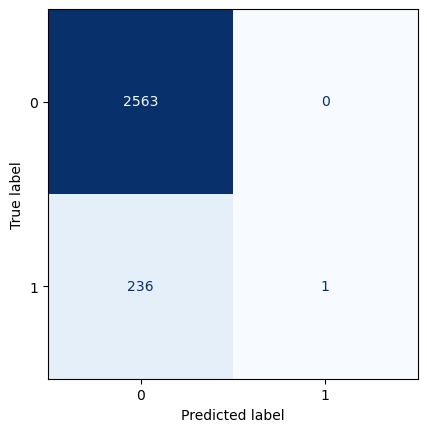

In [96]:
## Confusion Matrix for Training Data

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_regress,
                                     X_train,
                                     y_train,
                                     cmap='Blues',
                                     colorbar=False);

In [97]:
## Classification Report Training Data
from sklearn.metrics import classification_report
print(metrics.classification_report(y_true = y_train,
                                    y_pred = (log_regress.predict(X_train))))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2563
           1       1.00      0.00      0.01       237

    accuracy                           0.92      2800
   macro avg       0.96      0.50      0.48      2800
weighted avg       0.92      0.92      0.88      2800



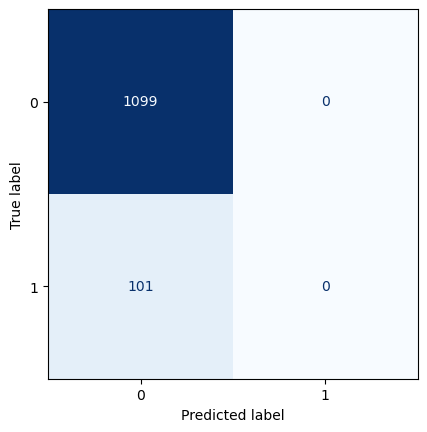

In [98]:
## Confusion Matrix Testing Data
preds_test = log_regress.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        preds_test,
                                     cmap='Blues',
                                     colorbar=False);

In [99]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = y_test,
                                    y_pred = (log_regress.predict(X_test))))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1099
           1       0.00      0.00      0.00       101

    accuracy                           0.92      1200
   macro avg       0.46      0.50      0.48      1200
weighted avg       0.84      0.92      0.88      1200



C:\Users\morin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\morin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\morin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Using Logistic Regression via SMOTE 

In [100]:
## Using Smote

# Initialize SMOTE
sm = SMOTE(random_state=1, sampling_strategy='minority')

# Resample the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Convert to a series
y_train_res = pd.Series(y_train_res)

# Convert X_train_res to a DataFrame
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)

y_train_res.value_counts()

0    2563
1    2563
Name: Florence, dtype: int64

In [101]:
## Fit data
log_regress.fit(X_train_res, y_train_res)

LogisticRegression()

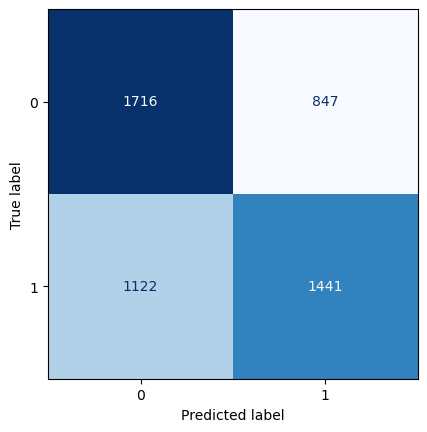

In [102]:
## Confusion Matrix Training Data
ConfusionMatrixDisplay.from_estimator(log_regress,
                                     X_train_res,
                                     y_train_res,
                                     cmap='Blues',
                                     colorbar=False);

In [103]:
## Classification Report Training Data
print(metrics.classification_report(y_true = y_train_res,
                                   y_pred = (log_regress.predict(X_train_res))))

              precision    recall  f1-score   support

           0       0.60      0.67      0.64      2563
           1       0.63      0.56      0.59      2563

    accuracy                           0.62      5126
   macro avg       0.62      0.62      0.61      5126
weighted avg       0.62      0.62      0.61      5126



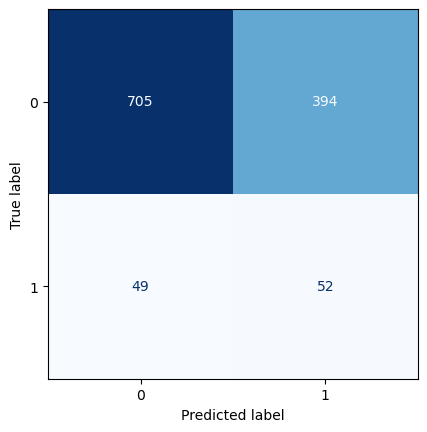

In [104]:
## Confusion Matrix Testing Data
preds_test = log_regress.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        preds_test,
                                     cmap='Blues',
                                     colorbar=False);

In [105]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = y_test,
                                    y_pred = (log_regress.predict(X_test))))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1099
           1       0.12      0.51      0.19       101

    accuracy                           0.63      1200
   macro avg       0.53      0.58      0.48      1200
weighted avg       0.87      0.63      0.71      1200



## Decision Tree (16 predictors)

In [20]:
## Define Feature and Target names for decision tree
X_names = ['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt',
       'Related Purchase']
y_names = ['DNP','Purchased']
print(X_names)
print(y_names)

['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Related Purchase']
['DNP', 'Purchased']


In [107]:
## CART Model
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion = 'gini',
                                max_depth = 7,
                               max_leaf_nodes = 20,
                               random_state = 1)

dt_clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20, random_state=1)

In [108]:
## Predicting training and testing values
preds_train = dt_clf.predict(X_train_res)
preds_test = dt_clf.predict(X_test)

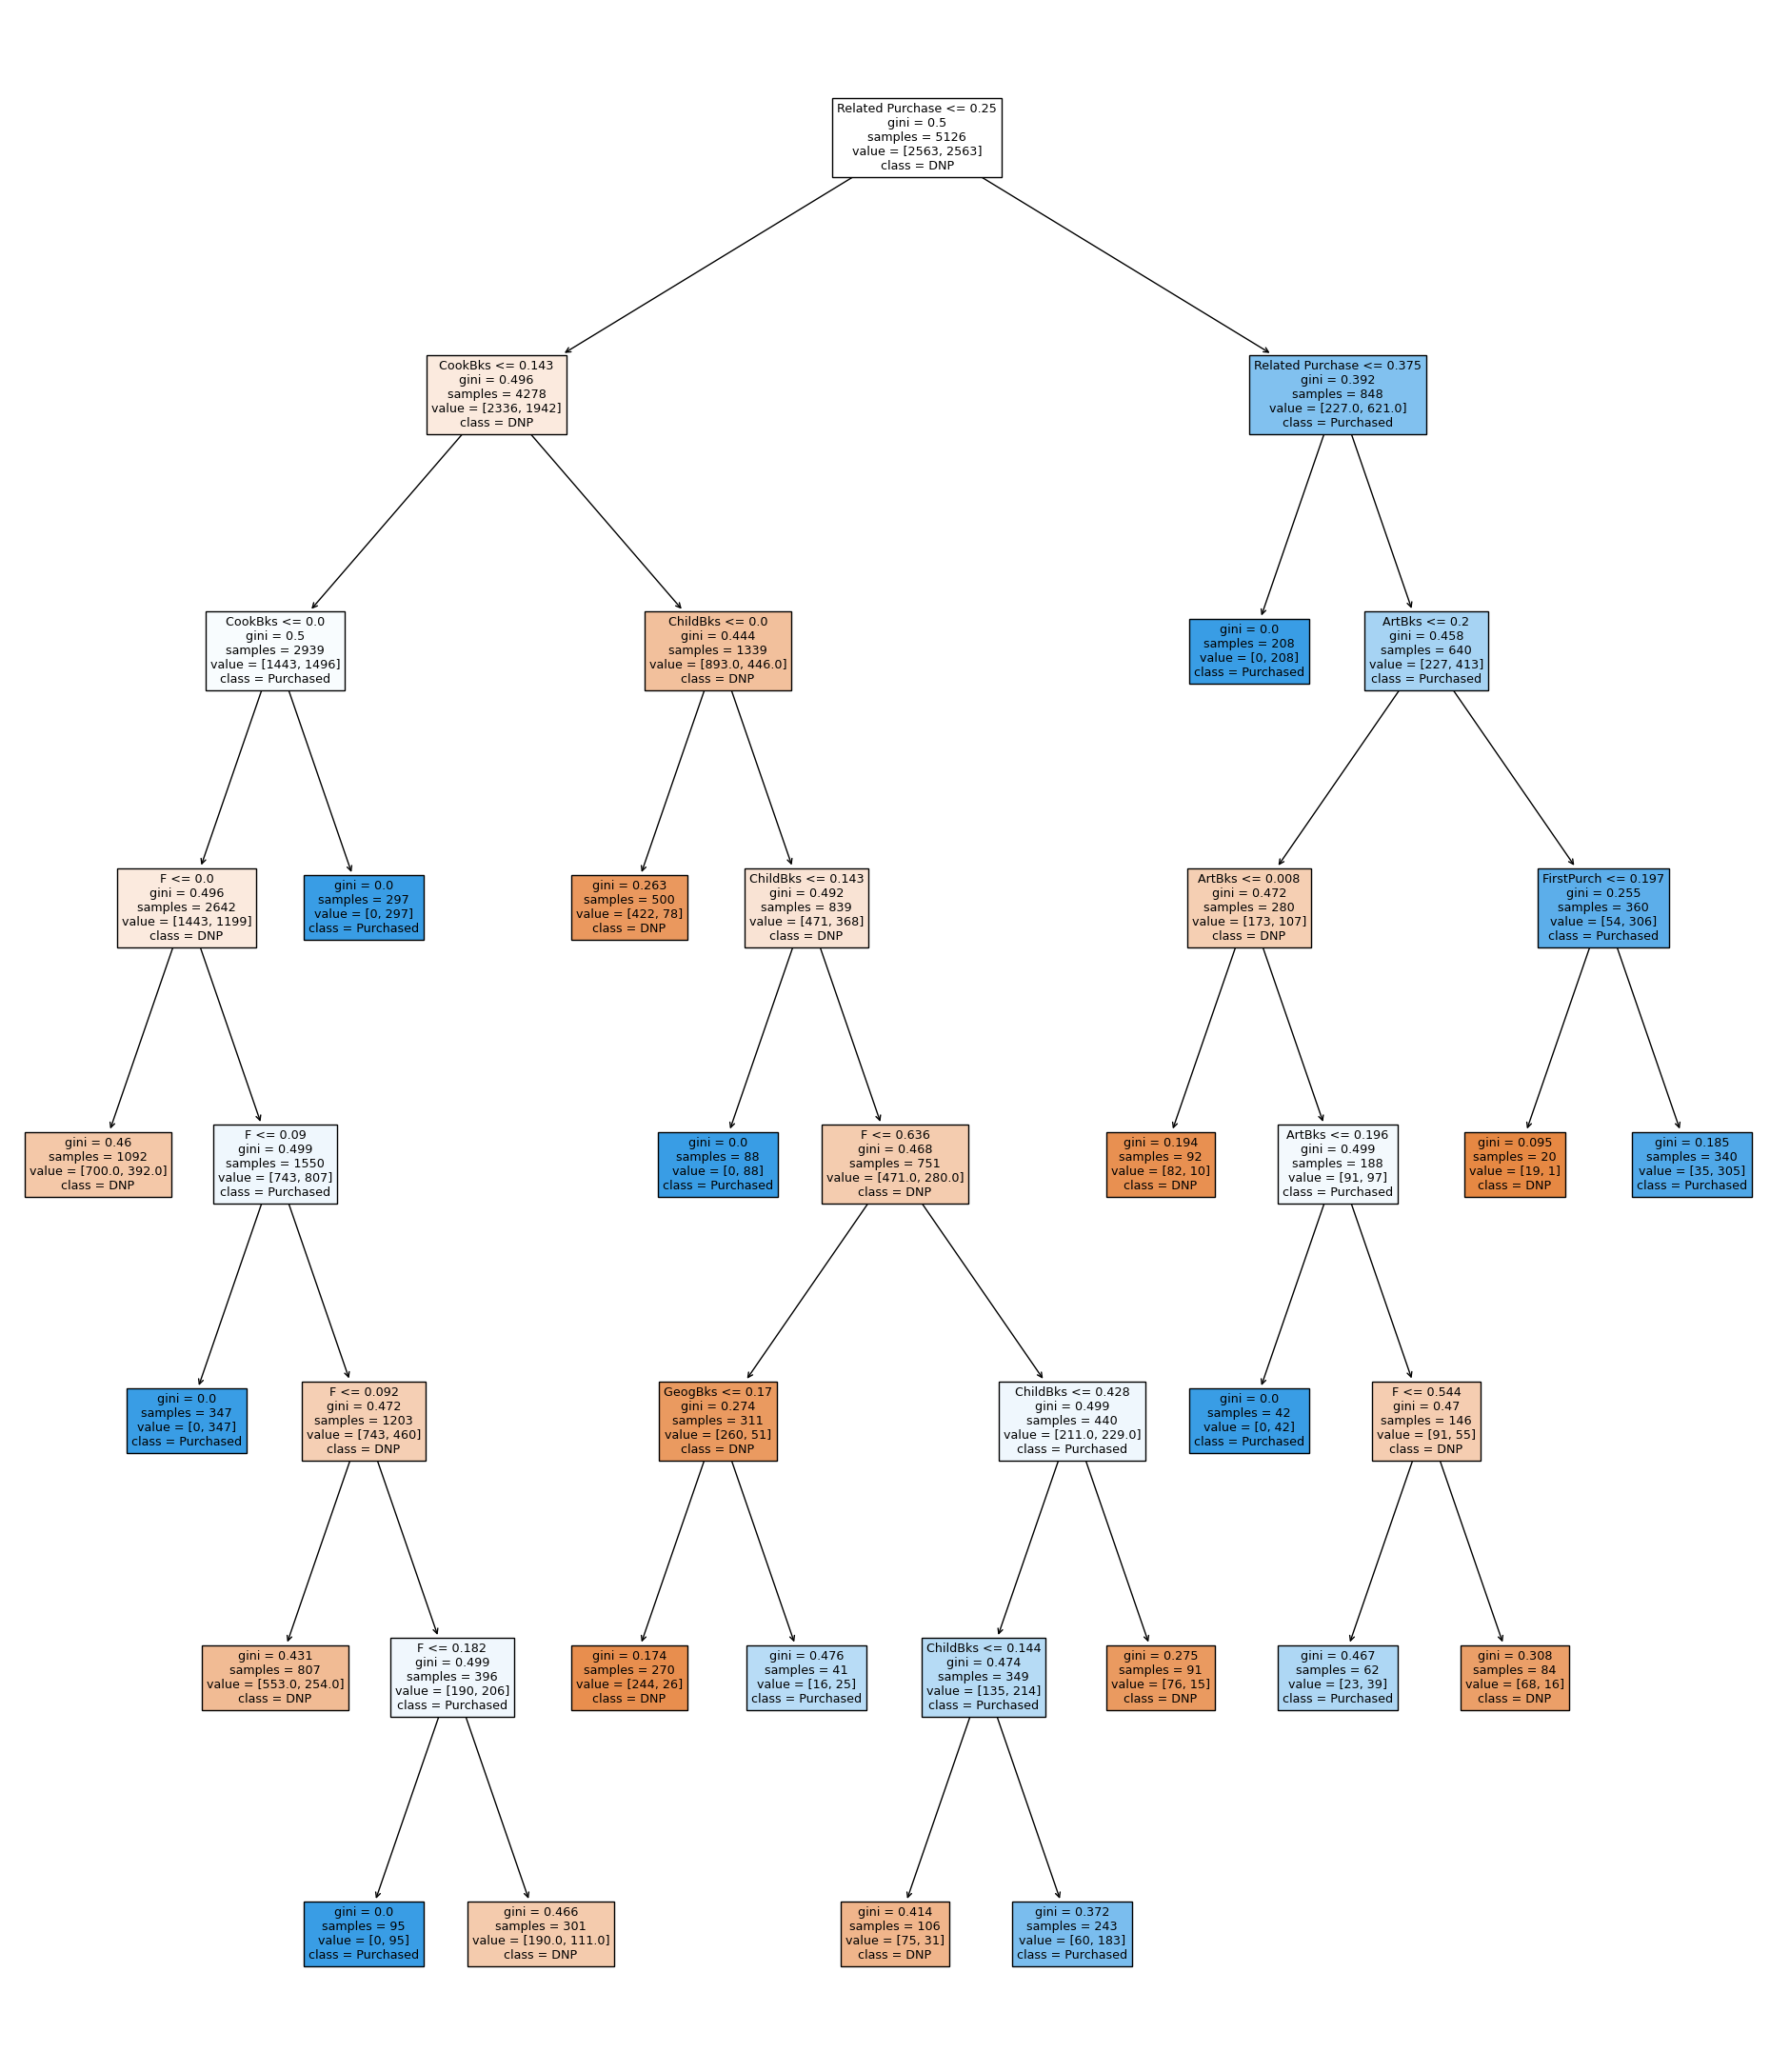

In [109]:
## Visualize Decision Tree
from sklearn import tree

fig = plt.figure(figsize=(24,28))
_ = tree.plot_tree(dt_clf,
                  feature_names = list(X_names),
                  class_names = y_names,
                  filled = True)

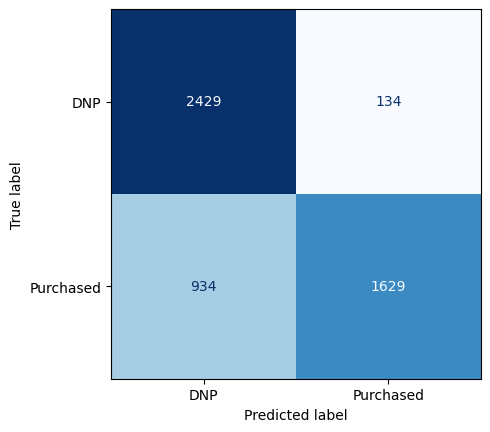

In [110]:
## Confusion Matrix for Training Data
ConfusionMatrixDisplay.from_estimator(dt_clf,
                                     X_train_res,
                                     y_train_res,
                                     display_labels = y_names,
                                      cmap='Blues',
                                     colorbar=False);

In [111]:
## Classification Report training data
print(metrics.classification_report(y_true = y_train_res,
                                   y_pred = (dt_clf.predict(X_train_res))))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      2563
           1       0.92      0.64      0.75      2563

    accuracy                           0.79      5126
   macro avg       0.82      0.79      0.79      5126
weighted avg       0.82      0.79      0.79      5126



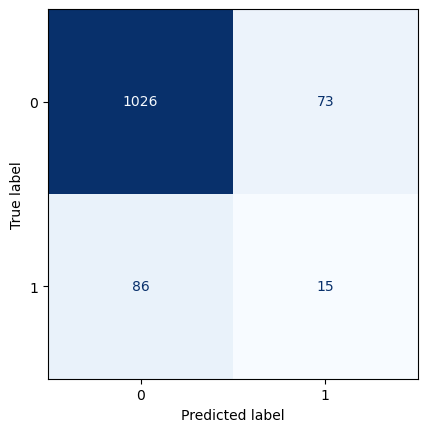

In [112]:
## Confusion Matrix testing data
ConfusionMatrixDisplay.from_predictions(y_test,
                                       preds_test,
                                       cmap='Blues',
                                       colorbar=False);

In [113]:
## Classification Report testing data
print(metrics.classification_report(y_true = y_test,
                                   y_pred = (dt_clf.predict(X_test))))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1099
           1       0.17      0.15      0.16       101

    accuracy                           0.87      1200
   macro avg       0.55      0.54      0.54      1200
weighted avg       0.86      0.87      0.86      1200



## Neural Network (16 predictors)

In [114]:
## Train model and instantiate an object
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes = (3),
                        activation = 'logistic',
                        solver = 'lbfgs',
                        max_iter = 1000,
                        random_state = 1)

# fit data
ann.fit(X_train_res, y_train_res)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=1000,
              random_state=1, solver='lbfgs')

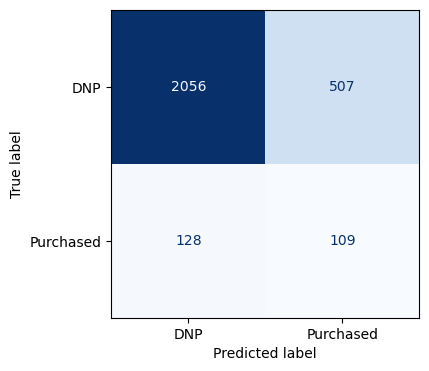

In [115]:
## Confusion Matrix Training Data
y_names = ['DNP','Purchased']
fig,ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(ann,
                                     X_train,
                                     y_train,
                                      colorbar = False,
                                      display_labels = y_names,
                                      cmap='Blues',
                                     ax = ax);

In [116]:
## Classification Report Training Data
print(metrics.classification_report(y_true = y_train_res,
                                   y_pred = (ann.predict(X_train_res))))

              precision    recall  f1-score   support

           0       0.61      0.80      0.69      2563
           1       0.71      0.48      0.58      2563

    accuracy                           0.64      5126
   macro avg       0.66      0.64      0.63      5126
weighted avg       0.66      0.64      0.63      5126



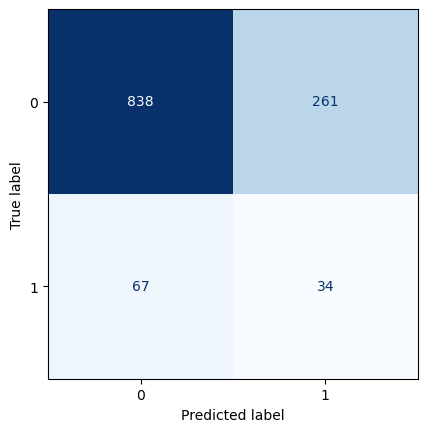

In [117]:
## Confusion Matrix Testing Data
preds_test = ann.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                       y_pred = preds_test,
                                        cmap='Blues',
                                       colorbar = False);

In [118]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = y_test,
                                   y_pred = (ann.predict(X_test))))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1099
           1       0.12      0.34      0.17       101

    accuracy                           0.73      1200
   macro avg       0.52      0.55      0.50      1200
weighted avg       0.86      0.73      0.78      1200



## Deciding a subset of predictors

In [33]:
## Finding correlations between variables
book[['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']].corr().style.background_gradient("Greens")

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
Seq#,1.000000,0.999921,-0.026506,-0.029390,0.012711,-0.013423,-0.007475,0.014387,-0.028946,-0.010129,0.009465,-0.028485,-0.014136,-0.000956,-0.003101,0.000455,-0.010484,-0.018865,-0.010294,-0.029998,0.014065,-0.024073,-0.018865,0.018865
ID#,0.999921,1.000000,-0.026276,-0.029619,0.012420,-0.013520,-0.007699,0.014241,-0.029291,-0.010053,0.009639,-0.028546,-0.014117,-0.000950,-0.003318,0.000490,-0.010771,-0.018829,-0.010394,-0.030301,0.014018,-0.024205,-0.018829,0.018829
Gender,-0.026506,-0.026276,1.000000,-0.011231,0.004569,0.001252,0.004645,-0.003756,0.010938,0.020793,-0.006701,-0.035448,-0.024078,0.018999,-0.035474,-0.011931,0.000190,-0.059338,-0.013375,-0.012905,0.010002,-0.010305,-0.059338,0.059338
M,-0.029390,-0.029619,-0.011231,1.000000,0.007779,0.509035,0.434561,0.358133,0.286340,0.369060,0.275389,0.250838,0.074617,0.348304,0.074979,0.141313,0.135598,0.034561,0.322495,0.852379,0.008581,0.406889,0.034561,-0.034561
R,0.012711,0.012420,0.004569,0.007779,1.000000,0.002797,0.448581,0.138025,0.068426,0.155865,0.105360,0.110035,0.033409,0.064075,0.055342,0.001067,0.060360,-0.059679,0.084040,0.006864,0.784557,-0.000480,-0.059679,0.059679
F,-0.013423,-0.013520,0.001252,0.509035,0.002797,1.000000,0.832149,0.676616,0.538481,0.716067,0.565413,0.483482,0.169759,0.375900,0.136091,0.254919,0.237463,0.079634,0.443442,0.352331,-0.005657,0.795994,0.079634,-0.079634
FirstPurch,-0.007475,-0.007699,0.004645,0.434561,0.448581,0.832149,1.000000,0.629666,0.479589,0.684791,0.536704,0.456534,0.163447,0.344532,0.145914,0.207257,0.231697,0.035297,0.414850,0.302350,0.354142,0.686685,0.035297,-0.035297
ChildBks,0.014387,0.014241,-0.003756,0.358133,0.138025,0.676616,0.629666,1.000000,0.280748,0.402993,0.314880,0.269048,0.075103,0.223254,0.115789,0.140590,0.175468,0.016060,0.266057,0.239582,0.164204,0.525870,0.016060,-0.016060
YouthBks,-0.028946,-0.029291,0.010938,0.286340,0.068426,0.538481,0.479589,0.280748,1.000000,0.327690,0.236058,0.189312,0.078008,0.220819,0.071364,0.129959,0.122680,0.032310,0.240666,0.199565,0.089282,0.420704,0.032310,-0.032310
CookBks,-0.010129,-0.010053,0.020793,0.369060,0.155865,0.716067,0.684791,0.402993,0.327690,1.000000,0.333651,0.294996,0.078949,0.234097,0.156987,0.176720,0.167704,-0.005085,0.292461,0.262060,0.170843,0.571478,-0.005085,0.005085


In [119]:
# using a threshold of .07, we decided that the subset of predictors we're going to use are F, ArtBks, GeogBks, and Related Purchase

## Logsistic Regression (subset of predictors)

In [120]:
## Defining Independent and Dependent Variables
A = book[['F_s','ArtBks_s','GeogBks_s','Related Purchase_s']]
z = book['Florence']

# Spliting the Dataset

A_train, A_test, z_train, z_test = train_test_split(A,
                                                    z,
                                                    test_size = .3,
                                                    random_state = 1,
                                                    stratify = y)

In [121]:
## Using Smote

# Resample the training data
A_train_res, z_train_res = sm.fit_resample(A_train, z_train)

# Convert y_train_res to a Series
z_train_res = pd.Series(z_train_res)

# Convert X_train_res to a DataFrame
A_train_res = pd.DataFrame(A_train_res, columns=A_train.columns)

In [130]:
## Logistic Regression model and fitting
log_regress_subset = LogisticRegression(solver = 'liblinear')
log_regress_subset.fit(X = A_train_res, y = z_train_res)

LogisticRegression(solver='liblinear')

In [131]:
## Testing the model
test_prob_subset = log_regress_subset.predict_proba(X = A_test) # Using the model to predict

test_prob_subset = pd.DataFrame(test_prob_subset) # Convert into a DataFrame

test_prob_subset.columns = ['Did not buy','Bought'] # Assigning Column names
test_prob_subset

,Did not buy,Bought
0,0.576590,0.423410
1,0.500493,0.499507
2,0.576590,0.423410
3,0.489585,0.510415
4,0.587208,0.412792
...,...,...
1195,0.515370,0.484630
1196,0.300885,0.699115
1197,0.587208,0.412792
1198,0.247906,0.752094


In [132]:
## Predicting Test Results
preds_subset = log_regress_subset.predict(X = A_test)

# Converting results to a DataFrame
preds_class_subset = pd.DataFrame(preds_subset)
preds_class_subset.columns = ['Prediction']

preds_class_subset

,Prediction
0,0
1,0
2,0
3,1
4,0
...,...
1195,0
1196,1
1197,0
1198,1


In [133]:
# Purchased prediction class
preds_class_subset[preds_class_subset['Prediction']==1]

,Prediction
3,1
5,1
8,1
9,1
11,1
...,...
1187,1
1194,1
1196,1
1198,1


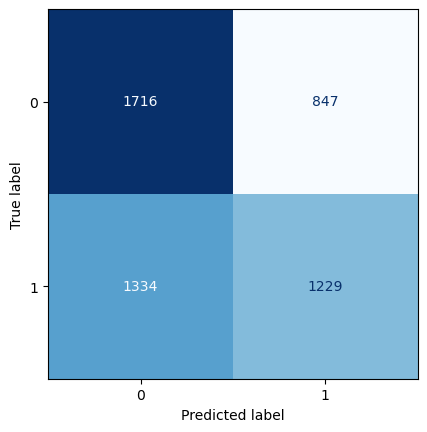

In [134]:
## Confusion Matrix Training Data

ConfusionMatrixDisplay.from_estimator(log_regress_subset,
                                     A_train_res,
                                     z_train_res,
                                     cmap='Blues',
                                     colorbar=False);

In [135]:
## Classification Report Training Data
print(metrics.classification_report(y_true = z_train_res,
                                    y_pred = log_regress_subset.predict(A_train_res)))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61      2563
           1       0.59      0.48      0.53      2563

    accuracy                           0.57      5126
   macro avg       0.58      0.57      0.57      5126
weighted avg       0.58      0.57      0.57      5126



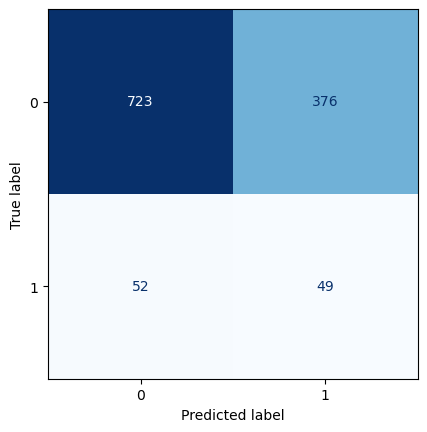

In [136]:
## Confusion Matrix Testing Data
preds_test_subset = log_regress_subset.predict(A_test)

ConfusionMatrixDisplay.from_predictions(z_test,
                                        preds_test_subset,
                                     cmap='Blues',
                                     colorbar=False);

In [137]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = z_test,
                                    y_pred = log_regress_subset.predict(A_test)))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1099
           1       0.12      0.49      0.19       101

    accuracy                           0.64      1200
   macro avg       0.52      0.57      0.48      1200
weighted avg       0.86      0.64      0.72      1200



## Decision Tree (subset of predictors)

In [139]:
## Define names for visualization of decision tree
A_names = ['F','ArtBks','GeogBks','Related Purchase']
z_names = ['DNP', 'Purchased']

In [140]:
## CART Model
dt_clf_subset = DecisionTreeClassifier(criterion = 'gini',
                                       max_depth = 5,
                               max_leaf_nodes = 6,
                               random_state = 1)

dt_clf_subset.fit(A_train_res, z_train_res)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, random_state=1)

In [141]:
## Predicting training and testing values
preds_train_subset = dt_clf_subset.predict(A_train_res)
preds_test_subset = dt_clf_subset.predict(A_test)

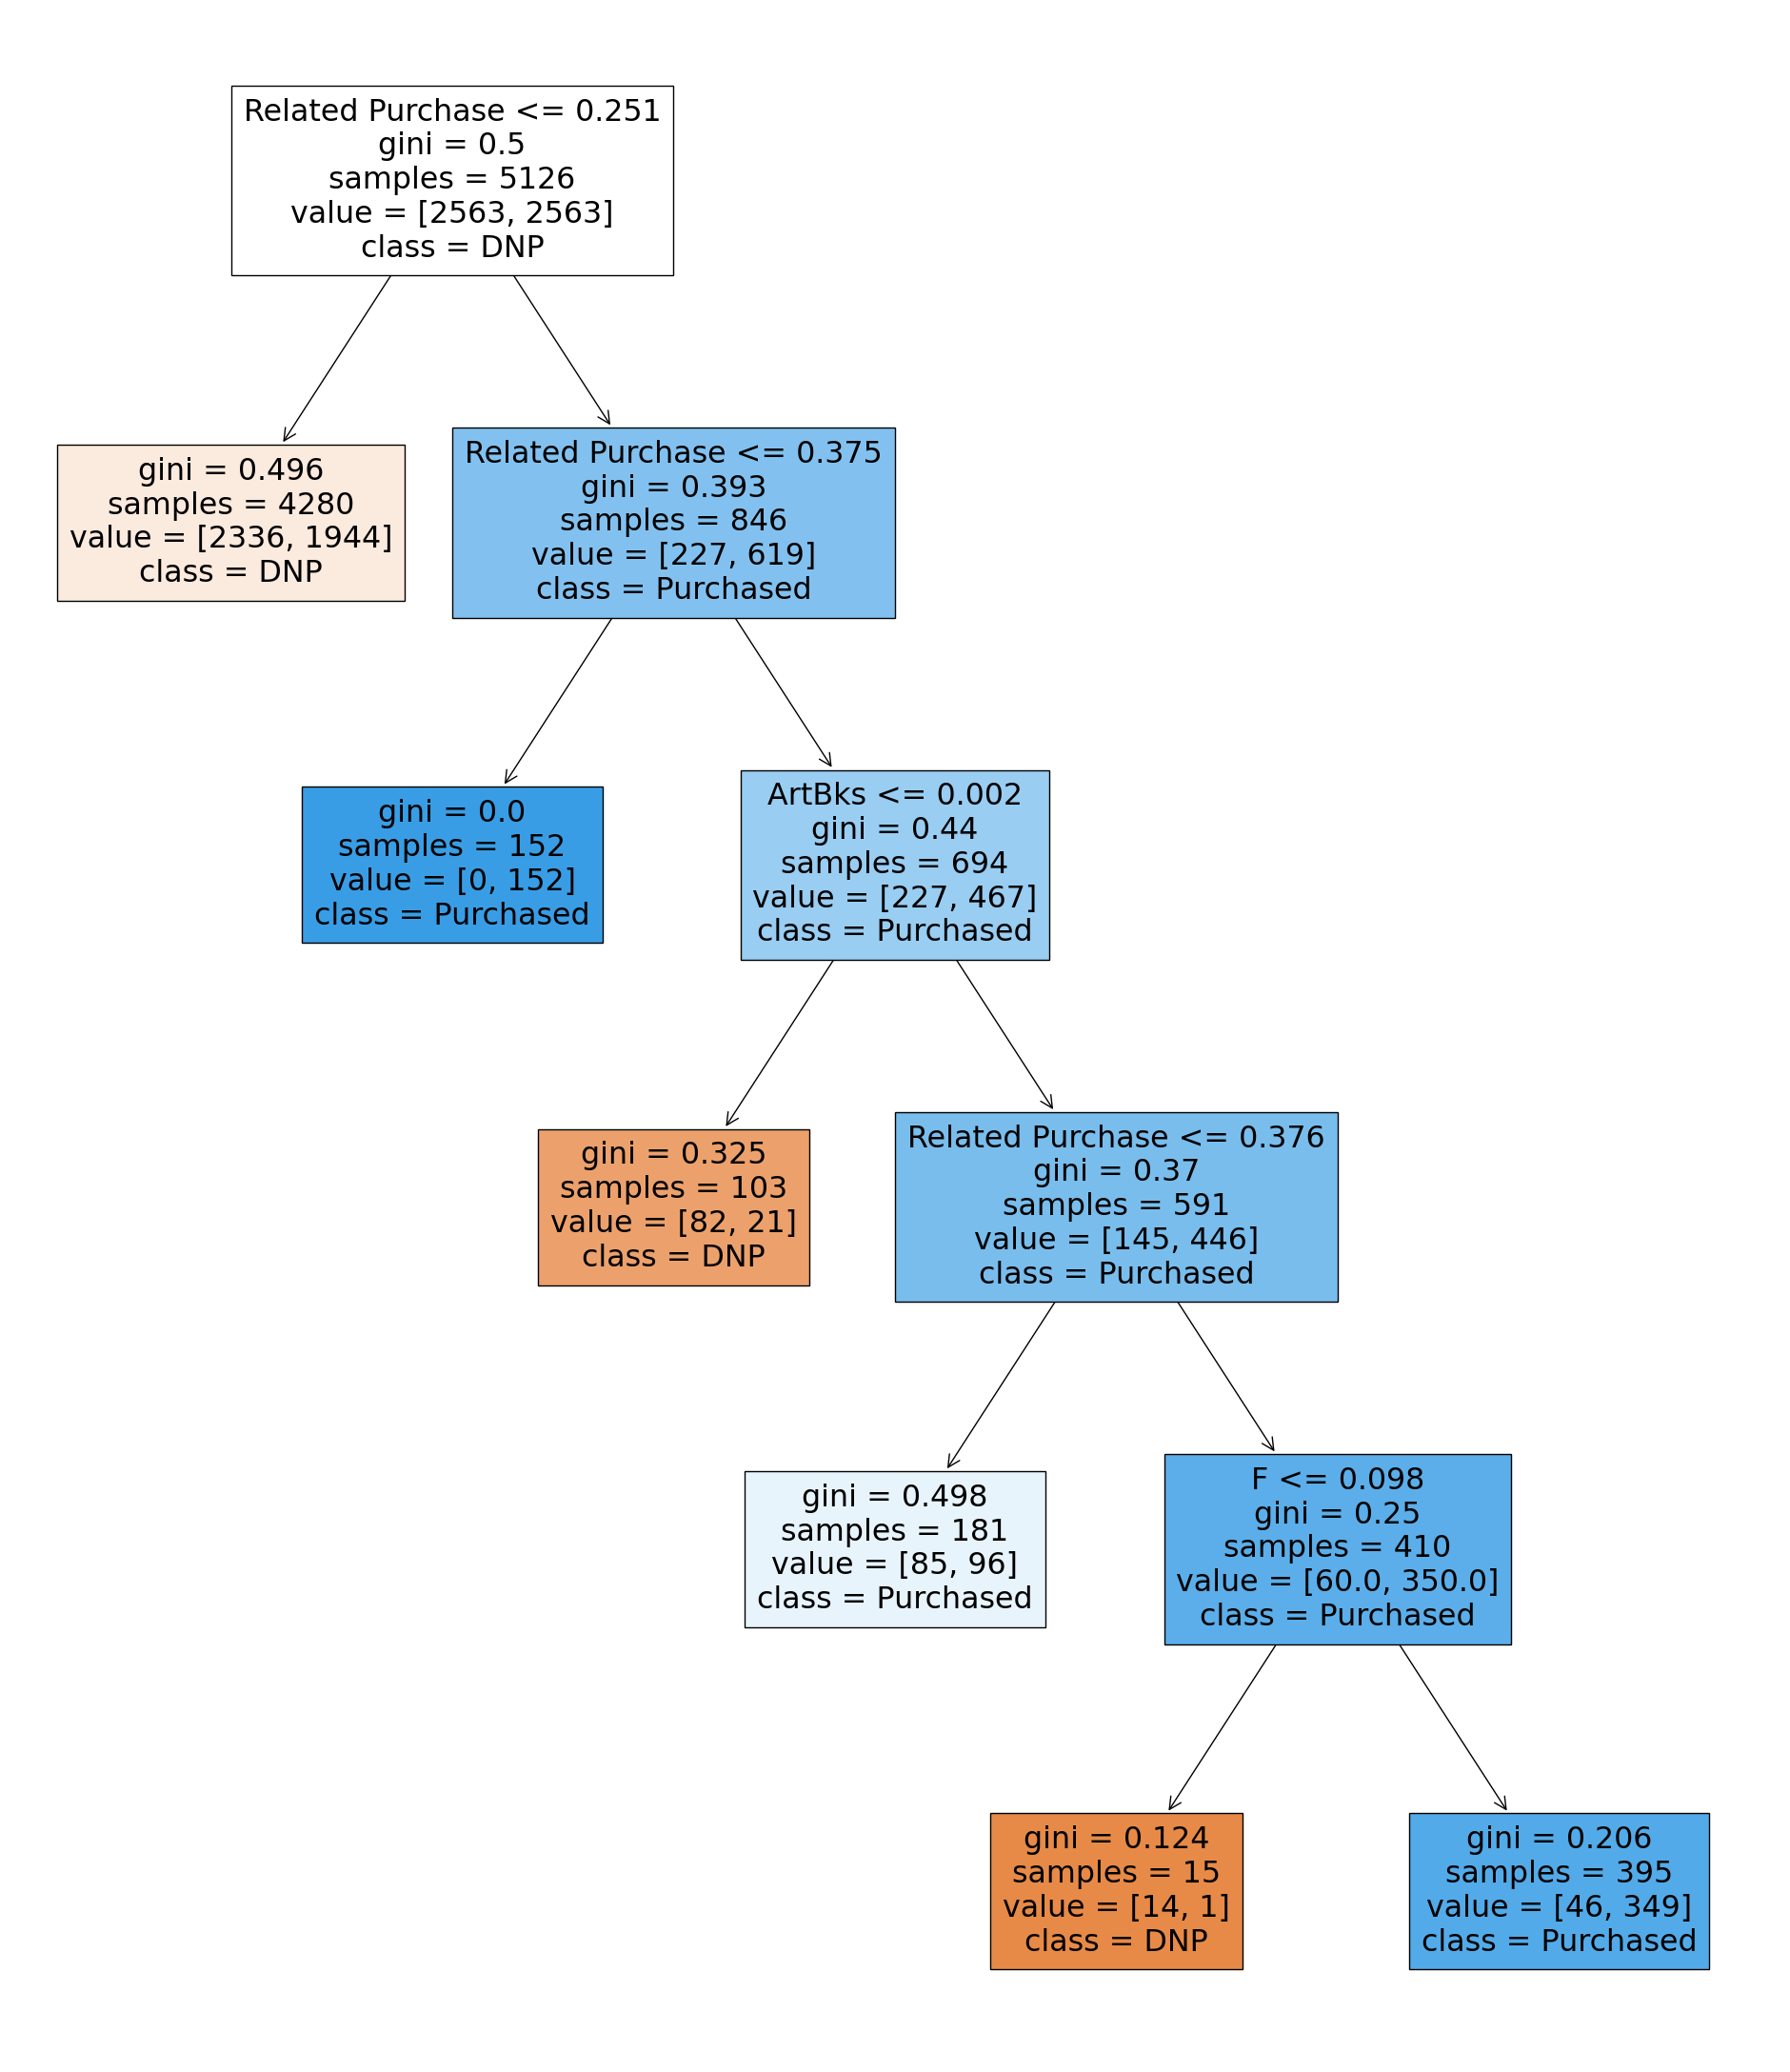

In [142]:
# Visualize Decision Tree
fig = plt.figure(figsize=(24,28))
_ = tree.plot_tree(dt_clf_subset,
                  feature_names = list(A_names),
                  class_names = z_names,
                  filled = True)

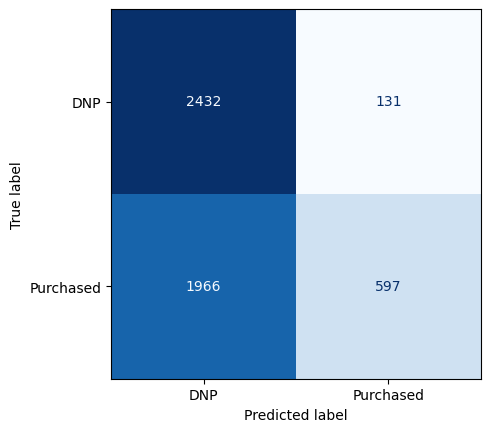

In [143]:
# Confusion Matrix Training data
ConfusionMatrixDisplay.from_estimator(dt_clf_subset,
                                     A_train_res,
                                     z_train_res,
                                     display_labels = z_names,
                                      cmap='Blues',
                                     colorbar=False);

In [144]:
## Classification Report Training Data
print(metrics.classification_report(y_true = z_train_res,
                                    y_pred = dt_clf_subset.predict(A_train_res)))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70      2563
           1       0.82      0.23      0.36      2563

    accuracy                           0.59      5126
   macro avg       0.69      0.59      0.53      5126
weighted avg       0.69      0.59      0.53      5126



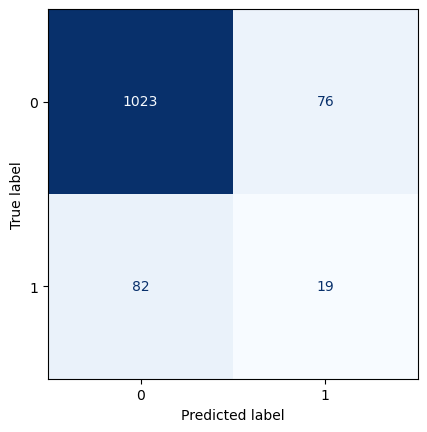

In [145]:
## Confusion Matrix Testing Data

ConfusionMatrixDisplay.from_predictions(z_test,
                                       preds_test_subset,
                                       cmap='Blues',
                                       colorbar=False);

In [146]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = z_test,
                                    y_pred = dt_clf_subset.predict(A_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1099
           1       0.20      0.19      0.19       101

    accuracy                           0.87      1200
   macro avg       0.56      0.56      0.56      1200
weighted avg       0.86      0.87      0.87      1200



## Neural Network (subset of predictors)

In [147]:
## Instantiate a variable of MLPClassifier and fit the data

ann_subset = MLPClassifier(hidden_layer_sizes = (3),
                        activation = 'logistic',
                        solver = 'lbfgs',
                        max_iter = 500,
                        random_state = 1)

# data fitting
ann_subset.fit(A_train_res, z_train_res)

C:\Users\morin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=500,
              random_state=1, solver='lbfgs')

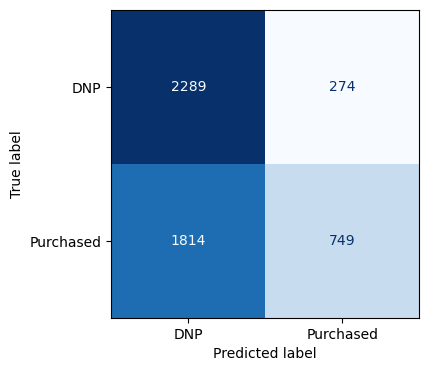

In [148]:
## Confusion Matrix Training Data

fig,ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(ann_subset,
                                     A_train_res,
                                     z_train_res,
                                      colorbar = False,
                                      display_labels = y_names,
                                      cmap='Blues',
                                     ax = ax);

In [149]:
## Classification Report Training Data
print(metrics.classification_report(y_true = z_train_res,
                                    y_pred = (ann_subset.predict(A_train_res))))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      2563
           1       0.73      0.29      0.42      2563

    accuracy                           0.59      5126
   macro avg       0.65      0.59      0.55      5126
weighted avg       0.65      0.59      0.55      5126



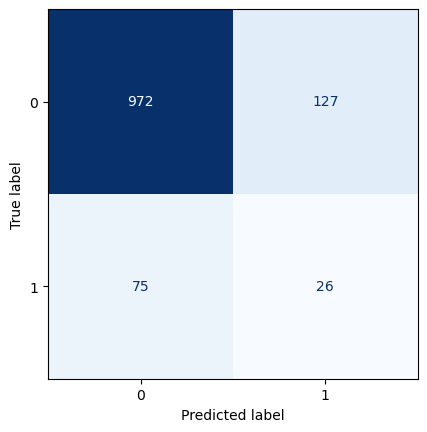

In [150]:
# Confusion Matrix Testing Data

ConfusionMatrixDisplay.from_predictions(y_true = z_test,
                                        y_pred = (ann_subset.predict(A_test)),
                                        cmap = 'Blues',
                                        colorbar = False);

In [152]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = z_test,
                                    y_pred = (ann_subset.predict(A_test))))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1099
           1       0.17      0.26      0.20       101

    accuracy                           0.83      1200
   macro avg       0.55      0.57      0.56      1200
weighted avg       0.86      0.83      0.85      1200



## RFM Variables

In [153]:
book.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,YouthBks_s,CookBks_s,DoItYBks_s,RefBks_s,ArtBks_s,GeogBks_s,ItalCook_s,ItalAtlas_s,ItalArt_s,Related Purchase_s
0,1,25,1,297,14,2,22,0,1,1,...,0.2,0.142857,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00
1,2,29,0,128,8,2,10,0,0,0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00
2,3,46,1,138,22,7,56,2,1,2,...,0.2,0.285714,0.0,0.25,0.0,0.166667,0.333333,0.0,0.0,0.25
3,4,47,1,228,2,1,2,0,0,0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00
4,5,51,1,257,10,1,10,0,0,0,...,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.00


## Logistic Regression (RFM variables)

In [154]:
## Defining Variables

S = book[['M_s','R_s','F_s']]
c = book['Florence']

# Splitting and training the data
S_train, S_test, c_train, c_test = train_test_split(S,
                                                    c,
                                                    test_size = .3,
                                                    random_state = 1,
                                                    stratify = c)

In [155]:
## SMOTE

# Resample the training data
S_train_res, c_train_res = sm.fit_resample(S_train, c_train)

# Convert y_train_res to a Series
c_train_res = pd.Series(c_train_res)

# Convert X_train_res to a DataFrame and set column names
S_train_res = pd.DataFrame(S_train_res, columns=S_train.columns)

In [161]:
## Instantiating Logistic Regression object
log_regress_rfm = LogisticRegression(solver = 'lbfgs')

# Fitting data
log_regress_rfm.fit(X = S_train_res, y = c_train_res)

LogisticRegression()

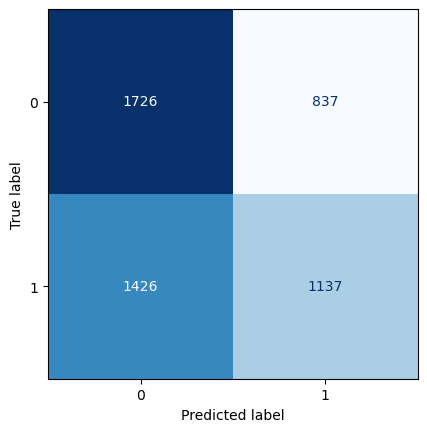

In [162]:
# Confusion Matrix Training Data

ConfusionMatrixDisplay.from_estimator(log_regress_rfm,
                                     S_train_res,
                                     c_train_res,
                                     cmap='Blues',
                                     colorbar=False);

In [163]:
## Classification Report Training Data
print(metrics.classification_report(y_true = c_train_res,
                                    y_pred = log_regress_rfm.predict(S_train_res)))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60      2563
           1       0.58      0.44      0.50      2563

    accuracy                           0.56      5126
   macro avg       0.56      0.56      0.55      5126
weighted avg       0.56      0.56      0.55      5126



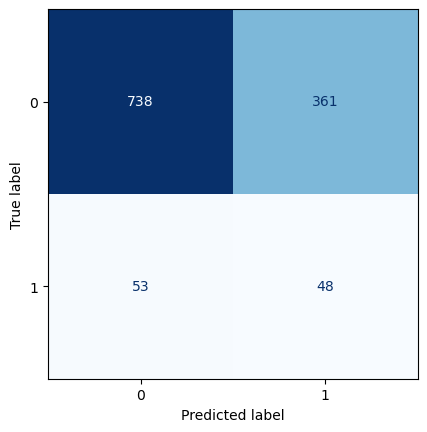

In [164]:
## Confusion Matrix Testing Data
p_test = log_regress_rfm.predict(S_test)

ConfusionMatrixDisplay.from_predictions(c_test,
                                        p_test,
                                         cmap='Blues',
                                         colorbar=False);

In [165]:
## Classifacation Report Testing D|ata
print(metrics.classification_report(y_true = c_test,
                                    y_pred = log_regress_rfm.predict(S_test)))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1099
           1       0.12      0.48      0.19       101

    accuracy                           0.66      1200
   macro avg       0.53      0.57      0.48      1200
weighted avg       0.86      0.66      0.73      1200



## Decision Tree (RFM Variables)

In [66]:
## Define names for visualization of decision tree
S_names = ['M','R','F']
c_names = ['DNP','Purchased']

In [188]:
## CART Model
dt_clf_rfm = DecisionTreeClassifier(criterion = 'gini',
                               max_leaf_nodes = 4,
                                    max_depth = 3,
                               random_state = 1)

# Fitting Data
dt_clf_rfm.fit(S_train_res, c_train_res)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=1)

In [189]:
## Predicting training and testing values
preds_train_rfm = dt_clf_rfm.predict(S_train_res)
preds_test_rfm = dt_clf_rfm.predict(S_test)

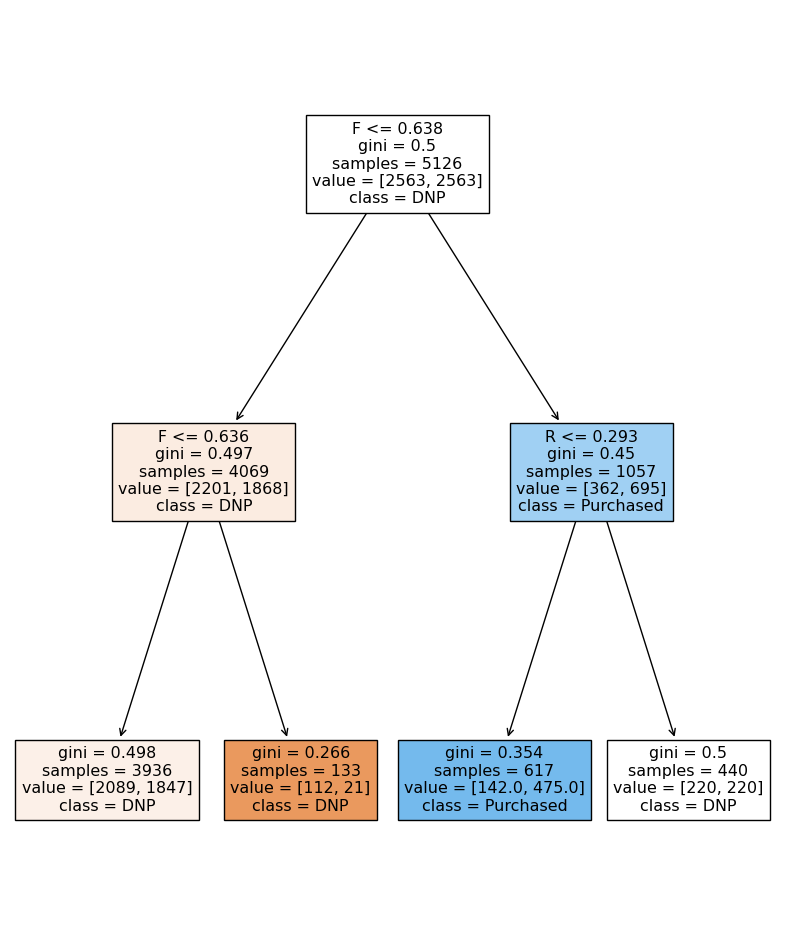

In [190]:
## Visualizing the tree
fig = plt.figure(figsize=(10,12))
                        
_ = tree.plot_tree(dt_clf_rfm,
                  feature_names = list(S_names),
                  class_names = c_names,
                  filled = True)

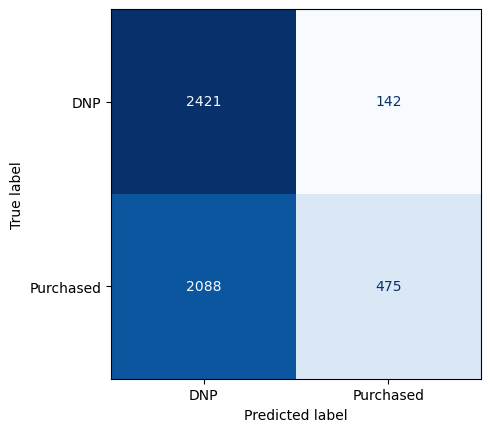

In [191]:
## Confusion Matrix Training Data
ConfusionMatrixDisplay.from_estimator(dt_clf_rfm,
                                     S_train_res,
                                     c_train_res,
                                     display_labels = c_names,
                                      cmap='Blues',
                                     colorbar=False);

In [192]:
## Classification Report Training Data
print(metrics.classification_report(y_true = c_train_res,
                                    y_pred = dt_clf_rfm.predict(S_train_res)))

              precision    recall  f1-score   support

           0       0.54      0.94      0.68      2563
           1       0.77      0.19      0.30      2563

    accuracy                           0.56      5126
   macro avg       0.65      0.56      0.49      5126
weighted avg       0.65      0.56      0.49      5126



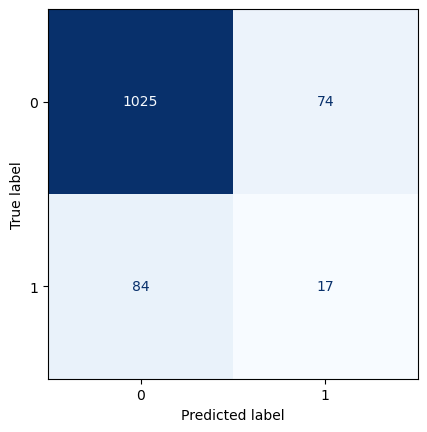

In [195]:
## Confusion Matrix Testing Data
p_test = dt_clf_rfm.predict(S_test)

ConfusionMatrixDisplay.from_predictions(c_test,
                                        p_test,
                                         cmap='Blues',
                                         colorbar=False);

In [196]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = c_test,
                                    y_pred = dt_clf_rfm.predict(S_test)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1099
           1       0.19      0.17      0.18       101

    accuracy                           0.87      1200
   macro avg       0.56      0.55      0.55      1200
weighted avg       0.86      0.87      0.87      1200



## Neural Network (RFM Variables)

In [174]:
## Instantiate an object of the MLPClassifier
ann_rfm = MLPClassifier(hidden_layer_sizes = (3),
                        activation = 'logistic',
                        solver = 'lbfgs',
                        max_iter = 500,
                        random_state = 1)

# Fitting Data
ann_rfm.fit(S_train_res, c_train_res)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=500,
              random_state=1, solver='lbfgs')

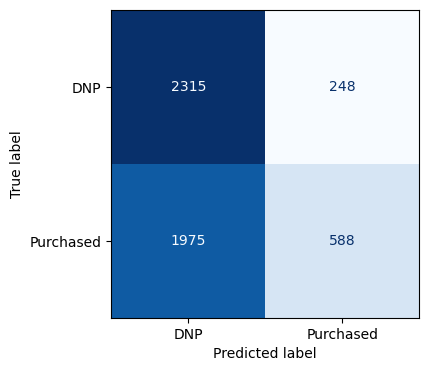

In [175]:
## Confusion Matrix Training Data

fig,ax = plt.subplots(figsize=(6,4))
ConfusionMatrixDisplay.from_estimator(ann_rfm,
                                     S_train_res,
                                     c_train_res,
                                      colorbar = False,
                                      display_labels = c_names,
                                      cmap='Blues',
                                     ax = ax);

In [176]:
## Classification Report Training Data
print(metrics.classification_report(y_true = c_train_res,
                                    y_pred = (ann_rfm.predict(S_train_res))))

              precision    recall  f1-score   support

           0       0.54      0.90      0.68      2563
           1       0.70      0.23      0.35      2563

    accuracy                           0.57      5126
   macro avg       0.62      0.57      0.51      5126
weighted avg       0.62      0.57      0.51      5126



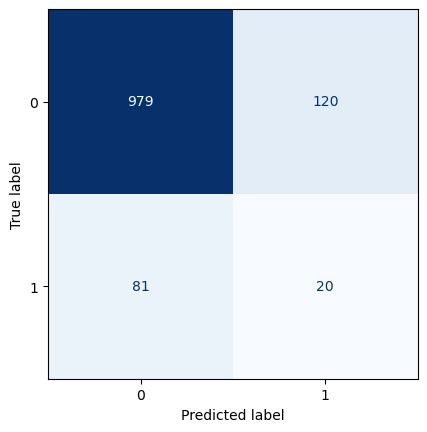

In [177]:
## Confusion Matrix Testing Data

ConfusionMatrixDisplay.from_predictions(y_true = c_test,
                                        y_pred = (ann_rfm.predict(S_test)),
                                        cmap = 'Blues',
                                        colorbar = False);

In [178]:
## Classification Report Testing Data
print(metrics.classification_report(y_true = c_test,
                                    y_pred = (ann_rfm.predict(S_test))))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1099
           1       0.14      0.20      0.17       101

    accuracy                           0.83      1200
   macro avg       0.53      0.54      0.54      1200
weighted avg       0.86      0.83      0.84      1200



# Discussion Report

In this report the 3 data sets/subsets will be refered to as follows:
all 16 predictors: Data Set 1
Judged predictors, (based on 0.07 threshold): Data Set 2
RFM predictors: Data Set 3


### Logistic Regression:

#### Assumptions of the Algorithm
* **Linearity Assumption**: Assumes a linear relationship between features and the target, which limits its performance with complex or nonlinear data.

#### Strengths Within Context
* **Interpretability**: Coefficients offer insights into feature importance and impact on predictions, which is beneficial for understanding customer behavior.
* **Simplicity**: Quick to train and low on computational requirements, suitable for rapid iterations.
* **Well-Established**: Effective for binary classification problems with linearly separable data, which is applicable in this case.

#### Limitations Within Context
* **Complexity Handling**: The large number of potential variables in this case may weaken the method's performance until the data is divided into more manageable subsets.

#### Results
* Logistic Regression performed the worst among the three models. The best scores on Data Set 1 were 0.76 using both 'liblinear' and 'lbfgs' solvers.
* The solver 'lbfgs' is used for its suitability with larger datasets as the class models typically didn't exceed four variables.
* Performance improvement was noticeable as the number of variables decreased, with scores improving from 0.76 in Data Set 1 to 0.78 in Data Set 3.
* The model also highlighted the need for balanced data, as it initially predicted no positive classes, which led to the use SMOTE for data balancing.

#### Analysis
* Logistic Regression will continue to be a valuable tool for simple problems, but its reliability decreases with the increase in the number of independent variables.

### Neural Networks:

#### Assumptions of the Algorithm
* **Data Requirements**: Requires large, high-quality datasets to effectively learn without overfitting. Sensitive to data noise, missing values, and outliers.

#### Strengths Within Context
* **Flexibility**: Can model complex, non-linear relationships due to its multi-layer architecture.
* **Feature Learning**: Capable of automatic feature extraction, which reduces the need for manual feature engineering.

#### Limitations Within Context
* **Interpretability**: Acts as a "black box," making it difficult to discern how decisions are made, potentially unsettling for stakeholders like CBC who prefer transparent operations.

#### Results
* Neural Networks ranked second in effectiveness, performing best on Data Sets 2 and 3 with F1 scores of 0.91.
* The model struggled with Data Set 1, which had a larger number of independent variables.
* Adjusting the number of hidden layers significantly influenced performance, with 3-4 layers being optimal. Increasing the max iterations from 1500 to 2000 improved the F1 score for Data Set 1 from 0.75 to 0.77.

#### Analysis
* Neural Networks are potent but less trusted due to their opaque nature. Best performance is seen with fewer than 16 independent variables.

### Decision Trees:

#### Assumptions of the Algorithm
* **Independence**: Assumes feature independence which may not hold true if strong correlations exist between features.
* **Sample Size**: Presumes availability of a reasonable sample size to represent the data distribution accurately.

#### Strengths Within Context
* **Interpretability**: Provides a visual representation of decision paths, enhancing transparency and ease of understanding.
* **Capability**: Effectively captures non-linear relationships without needing feature scaling or transformation.
* **Efficiency**: Offers quick predictions once trained, beneficial for rapid queries.

#### Limitations Within Context
* The assumption that the initial 4,000 sample data points are representative might not always hold, particularly for niche markets. Collecting such data can also be costly.

#### Results
* Decision Trees were the most effective model type across all datasets, consistently appearing in the top five F1 scores.
* Varying 'max_leaf_nodes' and 'max_depth' parameters showed that performance peaks at certain thresholds but plateaus beyond that, indicating diminishing returns with increased complexity.

#### Analysis
* Decision Trees proved to be the most reliable solution regardless of the dataset, offering both high performance and understandable logic, critical for stakeholder acceptance.


## Ethical Concerns

#### Logistic Regression
* Data Privacy: As with any data-driven model, using customer data to predict behavior could raise privacy issues, especially if the data isn't anonymized or shared without explicit consent.
* Transparency and Interpretability: Although Logistic Regression models are generally transparent, misinterpretation of their coefficients can lead to incorrect inferences, potentially influencing critical decisions.
#### Neural Networks
* Black Box Nature: The complex structure of neural networks makes them challenging to interpret, leading to ethical concerns regarding accountability and transparency in decision-making.
* Data Privacy and Security: Large amounts of data are needed to train neural networks effectively, which could lead to privacy violations if sensitive data is mishandled.
* Environmental Impact: The computational power required to train deep neural networks can be energy-intensive, raising concerns about environmental sustainability.
#### Decision Trees
* Overfitting and Over-Simplification: Decision trees can overfit to training data, especially if not properly pruned, leading to overly specific models that may not generalize well to new data.
* Interpretation and Misuse: While decision trees are more interpretable, misinterpreting the results or oversimplifying complex relationships can lead to incorrect decisions or conclusions.
* Transparency and Complexity: As decision trees grow larger, they can become harder to interpret, which might obscure the decision-making process and reduce accountability.


## Performance Comparison

**For a complete view of the results, please download the submitted Excel file.**

* For this case, it makes sense to use the F1 score as the primary comparison metric between models and parameter variations due to the cost of Type 1 and Type 2 errors.
* **Type 1 Errors**: These occur when someone is identified as a customer but doesn't purchase, resulting in wasted marketing dollars and the opportunity cost of not marketing to customers who would buy another book.
* **Type 2 Errors**: These occur when the model fails to identify a customer who would have bought the book, potentially losing the customer to a competitor with more accurate marketing.
* Since neither Type 1 nor Type 2 errors are acceptable for CBC to stay in business, the F1 score is used as the classification criterion to balance these costs.
* In case of a tie, the precision and recall were used to break it, as the cost of a false positive is higher than that of a false negative.

#### Decision Trees
* For Data Set 1, the optimal model/parameter configuration was a decision tree with `max_leaf_nodes=20` and `max_depth=7`.
  * **F1 Score**: 0.93
  * **Precision**: 0.92
  * **Recall**: 0.93
  * **Accuracy**: 0.87

* For Data Set 2, the optimal model/parameter configuration was a decision tree with `max_leaf_nodes=6` and `max_depth=5`.
  * **F1 Score**: 0.93
  * **Precision**: 0.93
  * **Recall**: 0.93
  * **Accuracy**: 0.87

* For Data Set 3, the optimal model/parameter configuration was a decision tree with `max_leaf_nodes=4` and `max_depth=3`.
  * **F1 Score**: 0.93
  * **Precision**: 0.92
  * **Recall**: 0.93
  * **Accuracy**: 0.87

#### Neural Networks
* For Data Set 1, the best model/parameter configuration for Neural Nets was `hidden_layer_sizes=4` and `max_iter=1000`.
  * **F1 Score**: 0.84
  * **Precision**: 0.92
  * **Recall**: 0.76
  * **Accuracy**: 0.73

* For Data Set 2, the best model/parameter configuration for Neural Nets was `hidden_layer_sizes=3` and `max_iter=500`.
  * **F1 Score**: 0.91
  * **Precision**: 0.89
  * **Recall**: 0.93
  * **Accuracy**: 0.84

* For Data Set 3, the best model/parameter configuration for Neural Nets was `hidden_layer_sizes=3` and `max_iter=500`.
  * **F1 Score**: 0.91
  * **Precision**: 0.92
  * **Recall**: 0.89
  * **Accuracy**: 0.83

#### Logistic Regression
* Changing the solver in Logistic Regression did not impact the results. Here are the classification reports for each data set:

* **Data Set 1**
  * **F1 Score**: 0.76
  * **Precision**: 0.93
  * **Recall**: 0.64
  * **Accuracy**: 0.63

* **Data Set 2**
  * **F1 Score**: 0.77
  * **Precision**: 0.93
  * **Recall**: 0.65
  * **Accuracy**: 0.64

* **Data Set 3**
  * **F1 Score**: 0.78
  * **Precision**: 0.93
  * **Recall**: 0.67
  * **Accuracy**: 0.66

## Conclusion and Recommendation

The final recommendation for CBC is to use the RFM data set and the decision tree model with `max_depth=3` and `max_leaf_nodes=4`, which tied for the highest F1 score and benefits from industry consensus. RFM (recency, frequency, and monetary value) are standard measures in the marketing industry, and it makes sense to use this established solution that already has the trust of its users.








